#### Dataset Link = https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kartik2112/fraud-detection
!unzip -q fraud-detection.zip
!ls

import pandas as pd
df = pd.read_csv('fraudTrain.csv')
print(df.shape)
print(df.head())


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 60% 122M/202M [00:00<00:00, 1.28GB/s]
100% 202M/202M [00:00<00:00, 813MB/s] 
eda		     fraudTest.csv   kaggle.json  sample_data
fraud-detection.zip  fraudTrain.csv  plots
(1296675, 23)
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_tr

## **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

## **Reading Main Data**

In [ ]:
df = pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


## **Making Data**

In [ ]:
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

non_fraud_sampled = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Concatenate the balanced dataframes
data = pd.concat([fraud_df, non_fraud_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

data['is_fraud'].value_counts()

,count
is_fraud,
1,7506
0,7506


In [ ]:
data.to_csv("finalData.csv", index=False)

## **Info of Dataset**

In [ ]:
data = pd.read_csv("finalData.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1239072,2020-06-01 01:01:21,565399283797,fraud_Koepp-Witting,grocery_pos,312.81,Anthony,Allen,M,6993 Carr Lodge Apt. 311,...,42.8801,-117.2810,641,Economist,1993-11-24,c48f2efccb689f2daef9ebdb03e1edec,1370048481,42.663612,-117.720784,1
1,600804,2019-09-12 12:49:41,4683638447911,fraud_Bogisich-Homenick,misc_net,909.75,Daniel,Boyd,M,8925 Nicholas Points,...,30.2510,-92.5002,1261,Broadcast presenter,1972-07-01,68f2b98cba5c4ae6b7ff3f701d0cdc69,1347454181,30.624785,-91.516167,1
2,653321,2019-10-05 17:08:54,3520550088202337,fraud_Bechtelar-Rippin,food_dining,7.59,Micheal,Walters,M,15315 Vaughn Park Suite 356,...,47.8342,-90.0476,272,Freight forwarder,2001-07-05,b832170811fa7ce7ec76d9af27adecd2,1349456934,48.077562,-89.625358,0
3,585328,2019-09-05 13:34:08,343746486082492,fraud_Kilback Group,food_dining,3.41,Jeffrey,Munoz,M,836 Stephanie Union,...,44.8605,-85.8138,3096,"Social research officer, government",1975-10-11,7bbb699e093e3fb7d16c96093e95d66f,1346852048,45.478485,-86.138856,0
4,38242,2019-01-22 23:04:30,344709867813900,fraud_Gottlieb-Hansen,personal_care,17.52,Joanna,Hudson,F,2924 Bobby Trafficway,...,27.4703,-81.4872,50835,Environmental consultant,1986-01-30,5666921b2c9a994021da1bdbb9aea908,1327273470,27.686765,-81.094488,1


In [ ]:
data.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

*Description of numerical columns*

In [ ]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000
mean,4.145026e+17,299.517998,48731.356248,38.620164,-90.275251,9.051075e+04,1.348818e+09,38.612480,-90.275455,0.500000
std,1.301544e+18,373.915804,27126.671123,5.128513,14.084930,3.035544e+05,1.332573e+07,5.168227,14.105491,0.500017
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325402e+09,19.041880,-166.550779,0.000000
25%,1.800400e+14,20.497500,25442.000000,34.778900,-96.983700,7.430000e+02,1.337471e+09,34.896843,-96.989761,0.000000
50%,3.523898e+15,89.545000,47869.000000,39.405500,-87.410100,2.526000e+03,1.348876e+09,39.403182,-87.360104,0.500000
75%,4.642255e+15,477.102500,72042.000000,42.015800,-80.128400,2.112500e+04,1.359844e+09,41.991035,-80.168734,1.000000
max,4.992346e+18,6337.250000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371813e+09,67.510267,-67.027467,1.000000


*Description of categorical columns*

In [ ]:
data.describe(exclude='number')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012,15012
unique,15006,693,14,352,480,2,977,889,51,493,962,15012
top,2020-02-21 23:02:22,fraud_Kilback LLC,grocery_pos,Christopher,Smith,F,561 Little Plain Apt. 738,Warren,TX,Materials engineer,1981-08-29,e15a5a170cd384d2e514f7b0231b605f
freq,2,72,2494,330,301,7835,38,57,1024,114,48,1


In [ ]:
cols = data.columns
for col in cols:
    print(f"{col} has min value {df[col].min()} and max value {df[col].max()}")
    print("*"*45)

trans_date_trans_time has min value 2019-01-01 00:00:18 and max value 2020-06-21 12:13:37
*********************************************
cc_num has min value 60416207185 and max value 4992346398065154184
*********************************************
merchant has min value fraud_Abbott-Rogahn and max value fraud_Zulauf LLC
*********************************************
category has min value entertainment and max value travel
*********************************************
amt has min value 1.0 and max value 28948.9
*********************************************
first has min value Aaron and max value Zachary
*********************************************
last has min value Abbott and max value Zuniga
*********************************************
gender has min value F and max value M
*********************************************
street has min value 000 Jennifer Mills and max value 99736 Rose Shoals Apt. 504
*********************************************
city has min value Achille and max val

## **EDA**

In [ ]:
import os

os.makedirs("eda", exist_ok=True)

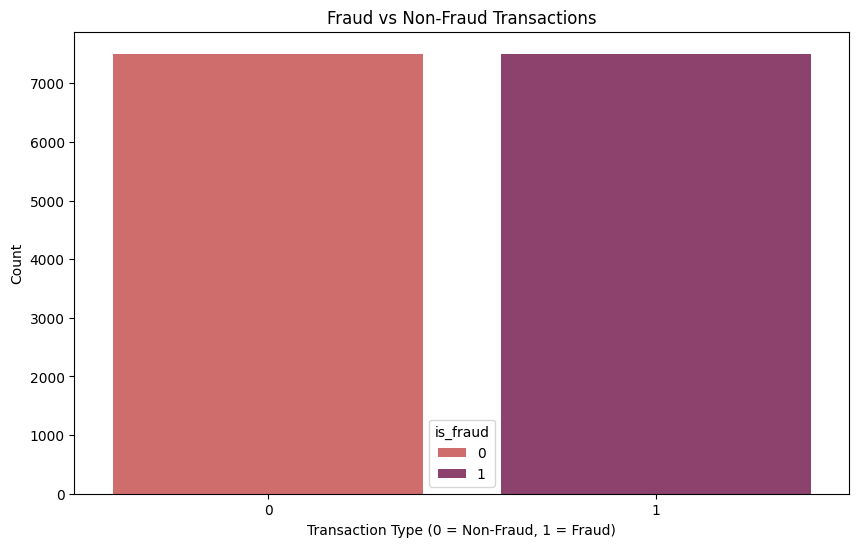

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['is_fraud'], hue=data["is_fraud"],palette="flare")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.savefig("./eda/1_fraud_vs_nonfraud.png")
plt.show()

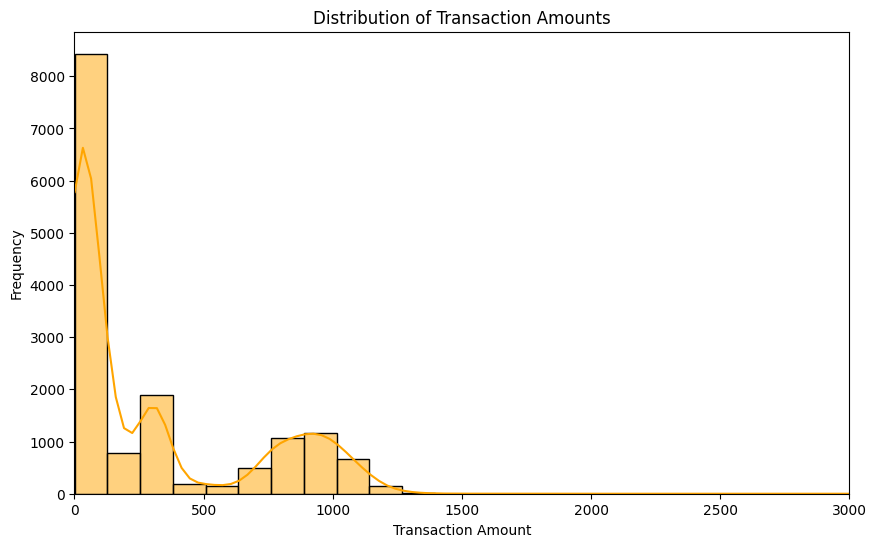

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data["amt"], bins=50, kde=True, color="orange")
plt.title("Distribution of Transaction Amounts")
plt.xlim(0, 3000)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.savefig("./eda/2_dist_trans_amount.png")
plt.show()

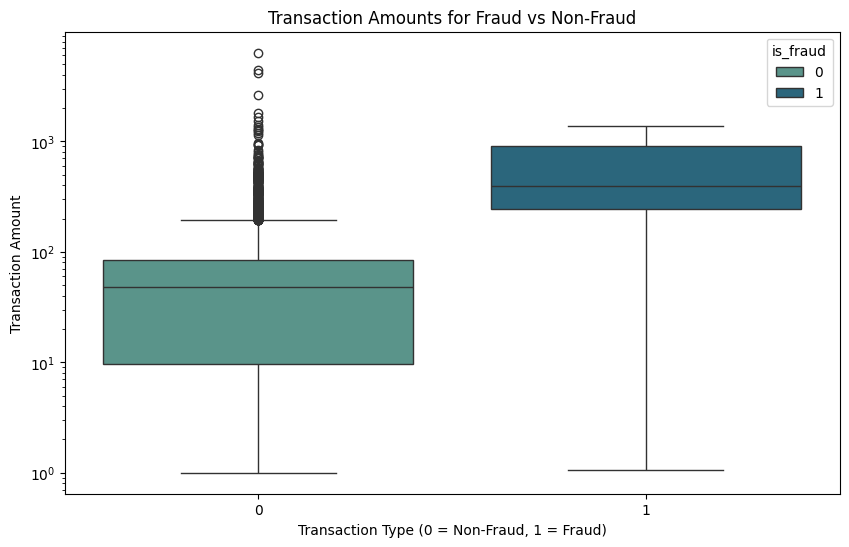

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="is_fraud", y="amt", data=data, hue="is_fraud",palette="crest")
plt.title("Transaction Amounts for Fraud vs Non-Fraud")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # Use log scale to handle skewed data
plt.savefig("./eda/3_amount_fraud_vs_nonfraud.png")
plt.show()

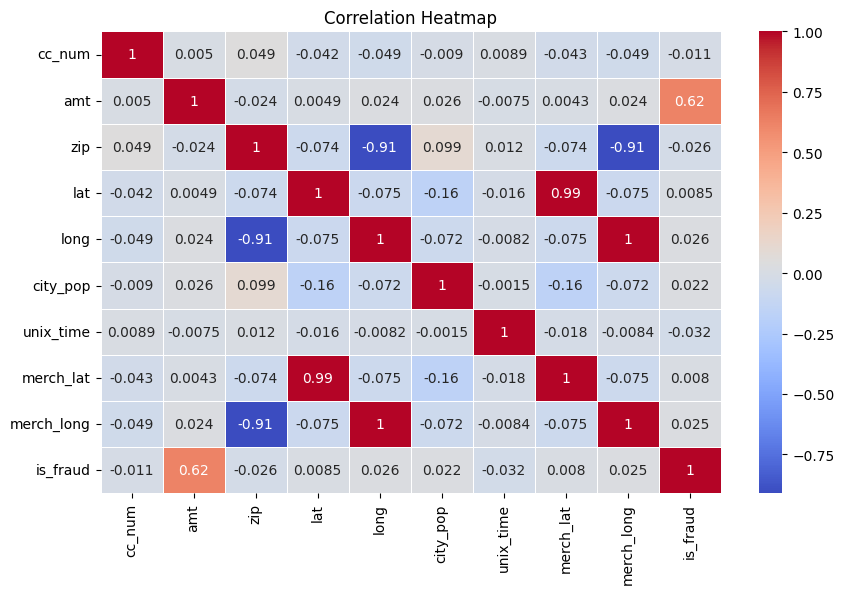

In [ ]:
df_numeric = data.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(10, 6))
corr = df_numeric.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("./eda/4_heatmap.png")
plt.show()

In [ ]:
len(data['category'].value_counts().to_dict().values())

14

In [ ]:
len(data['category'].unique().tolist())

14

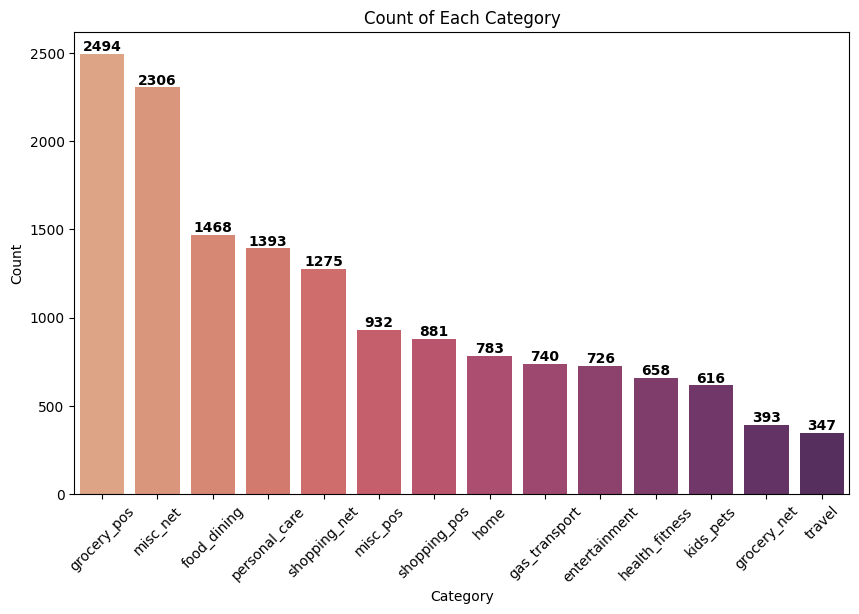

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=data['category'].unique().tolist(), y=data['category'].value_counts().to_dict().values(),
            hue=data['category'].unique().tolist(), palette="flare")

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',   # format to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black', fontweight='bold'
    )

plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Count of Each Category")
plt.savefig("eda/5_category_count.png")
plt.show()

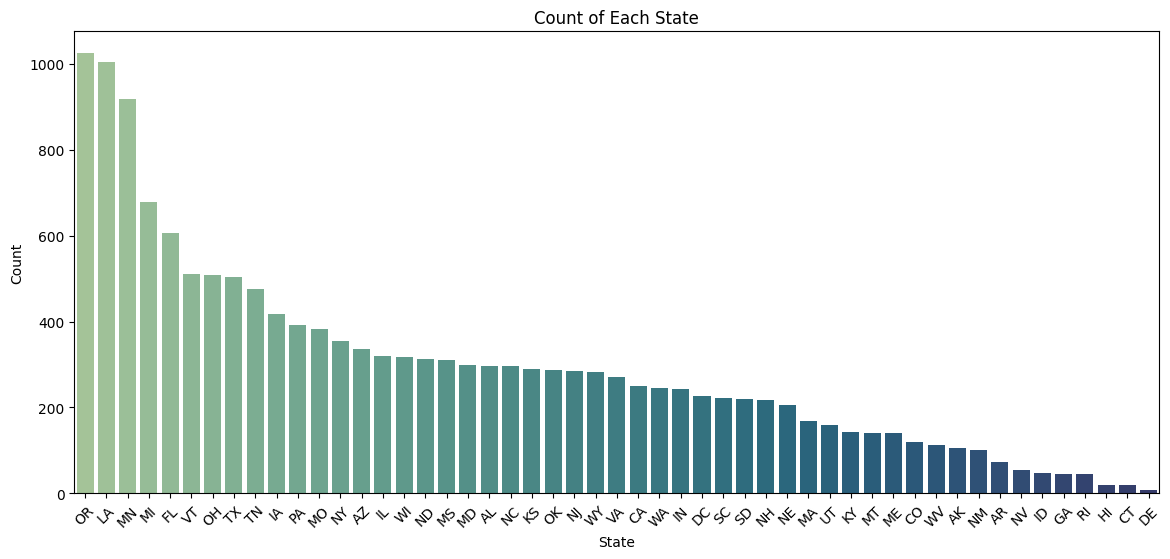

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=data['state'].unique().tolist(), y=data['state'].value_counts().to_dict().values(),
            hue=data['state'].unique().tolist(), palette="crest")

plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Count of Each State")
plt.savefig("eda/6_state_count.png")
plt.show()

## **Dropping unwanted columns**

In [ ]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
cols_to_keep = ['amt', 'category', 'unix_time', 'state', 'is_fraud']

data = data[cols_to_keep]

data.head()

,amt,category,unix_time,state,is_fraud
0,312.81,grocery_pos,1370048481,OR,1
1,909.75,misc_net,1347454181,LA,1
2,7.59,food_dining,1349456934,MN,0
3,3.41,food_dining,1346852048,MI,0
4,17.52,personal_care,1327273470,FL,1


In [ ]:
data['category'].unique()

array(['grocery_pos', 'misc_net', 'food_dining', 'personal_care',
       'shopping_net', 'misc_pos', 'shopping_pos', 'home',
       'gas_transport', 'entertainment', 'health_fitness', 'kids_pets',
       'grocery_net', 'travel'], dtype=object)

In [ ]:
data['state'].unique()

array(['OR', 'LA', 'MN', 'MI', 'FL', 'VT', 'OH', 'TX', 'TN', 'IA', 'PA',
       'MO', 'NY', 'AZ', 'IL', 'WI', 'ND', 'MS', 'MD', 'AL', 'NC', 'KS',
       'OK', 'NJ', 'WY', 'VA', 'CA', 'WA', 'IN', 'DC', 'SC', 'SD', 'NH',
       'NE', 'MA', 'UT', 'KY', 'MT', 'ME', 'CO', 'WV', 'AK', 'NM', 'AR',
       'NV', 'ID', 'GA', 'RI', 'HI', 'CT', 'DE'], dtype=object)

In [ ]:
data['hour'] = pd.to_datetime(data['unix_time'], unit='s').dt.hour
data['dayofweek'] = pd.to_datetime(data['unix_time'], unit='s').dt.dayofweek
data['is_weekend'] = data['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
data.drop('unix_time', axis=1, inplace=True)
data.head()

,amt,category,state,is_fraud,hour,dayofweek,is_weekend
0,312.81,grocery_pos,OR,1,1,5,1
1,909.75,misc_net,LA,1,12,2,0
2,7.59,food_dining,MN,0,17,4,0
3,3.41,food_dining,MI,0,13,2,0
4,17.52,personal_care,FL,1,23,6,1


## **Distribution**

In [ ]:
data[data['is_fraud'] ==1 ].head(10)

,amt,category,state,is_fraud,hour,dayofweek,is_weekend
0,312.81,grocery_pos,OR,1,1,5,1
1,909.75,misc_net,LA,1,12,2,0
4,17.52,personal_care,FL,1,23,6,1
5,877.46,shopping_net,VT,1,22,5,1
6,9.14,misc_pos,OH,1,23,4,0
8,999.84,shopping_net,OR,1,12,3,0
12,11.03,gas_transport,PA,1,3,3,0
16,272.15,grocery_pos,AZ,1,0,2,0
17,1090.93,shopping_net,MO,1,0,0,0
18,777.95,shopping_pos,IA,1,2,3,0


In [ ]:
data[data['is_fraud'] == 0].head(10)

,amt,category,state,is_fraud,hour,dayofweek,is_weekend
2,7.59,food_dining,MN,0,17,4,0
3,3.41,food_dining,MI,0,13,2,0
7,4.85,shopping_net,TX,0,11,0,0
9,1.65,shopping_pos,TX,0,5,0,0
10,47.08,home,TN,0,14,5,1
11,7.08,food_dining,IA,0,18,4,0
13,55.75,gas_transport,MO,0,11,3,0
14,51.81,entertainment,NY,0,21,3,0
15,41.22,gas_transport,OH,0,3,4,0
19,50.56,gas_transport,IL,0,0,3,0


## **Dependent and Independent Variables**

In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']


## **Encoding Categorical Features**

In [ ]:
import pickle

X = pd.get_dummies(X, columns=['category'], dtype=int)

saved_categories = [col for col in X.columns if col.startswith("category_")]

with open('saved_categories.pkl', 'wb') as f:
    pickle.dump(saved_categories, f)


In [ ]:
X = pd.get_dummies(X, columns=['state'], dtype=int)
saved_states = [col for col in X.columns if col.startswith("state_")]

with open('saved_states.pkl', 'wb') as f:
    pickle.dump(saved_states, f)


## **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Preprocessing**

**Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(12009, 69)

## **Model Building**

In [ ]:
os.makedirs("plots", exist_ok=True)

#### **ANN**

*Model Building*

In [ ]:
# Build the ANN model
ann_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

*Model Compilation*

In [ ]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*Model Training*

In [ ]:
ann_model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_data=(X_test_scaled, y_test))

Epoch 1/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7273 - loss: 0.5318 - val_accuracy: 0.8315 - val_loss: 0.3438
Epoch 2/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8462 - loss: 0.3248 - val_accuracy: 0.8535 - val_loss: 0.2916
Epoch 3/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8765 - loss: 0.2666 - val_accuracy: 0.8791 - val_loss: 0.2526
Epoch 4/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8868 - loss: 0.2339 - val_accuracy: 0.8914 - val_loss: 0.2376
Epoch 5/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9077 - loss: 0.2062 - val_accuracy: 0.9001 - val_loss: 0.2165
Epoch 6/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9132 - loss: 0.1964 - val_accuracy: 0.8991 - val_loss: 0.2089
Epoch 7/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9197 - loss: 0.1854 - val_accuracy: 0.9164 - val_loss: 0.1945
Epoch 8/20
751/751 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9260 - loss: 0.1703 - val_accuracy: 0

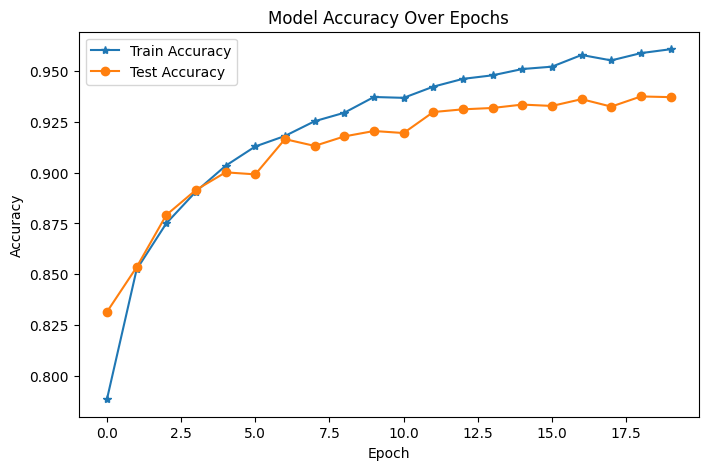

In [ ]:
# Plot accuracy curve for train and test
history = ann_model.history.history if hasattr(ann_model, 'history') and hasattr(ann_model.history, 'history') else None

plt.figure(figsize=(8, 5))
plt.plot(history['accuracy'], label='Train Accuracy', marker="*")
plt.plot(history['val_accuracy'], label='Test Accuracy', marker="o")
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

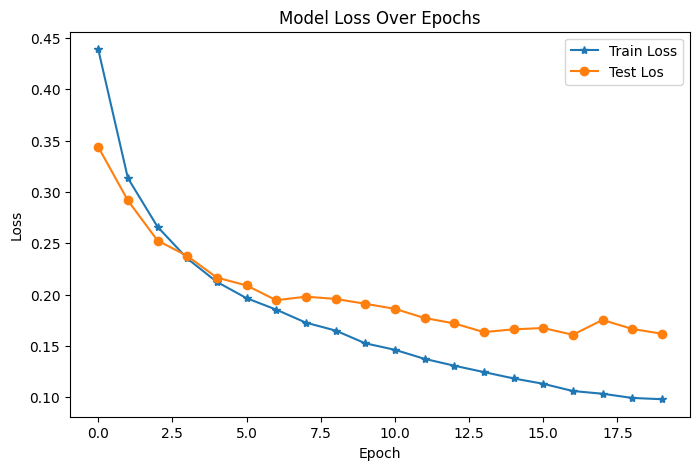

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history['loss'], label='Train Loss', marker="*")
plt.plot(history['val_loss'], label='Test Los', marker="o")
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

*Evaluation Metrics*

In [ ]:
ann_y_pred = (ann_model.predict(X_test_scaled) > 0.5).astype(int)
ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_precision = precision_score(y_test, ann_y_pred)
ann_recall = recall_score(y_test, ann_y_pred)
ann_f1 = f1_score(y_test, ann_y_pred)

print(f"Accuracy of ANN {ann_accuracy:.2f}")
print(f"Precision of ANN {ann_precision:.2f}")
print(f"Recall of ANN {ann_recall:.2f}")
print(f"F1 Score of ANN {ann_f1:.2f}")

print("Classification Report:\n", classification_report(y_test, ann_y_pred))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy of ANN 0.94
Precision of ANN 0.94
Recall of ANN 0.93
F1 Score of ANN 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1502
           1       0.94      0.93      0.94      1501

    accuracy                           0.94      3003
   macro avg       0.94      0.94      0.94      3003
weighted avg       0.94      0.94      0.94      3003



*Confusion Matrix*

<Figure size 1000x600 with 0 Axes>

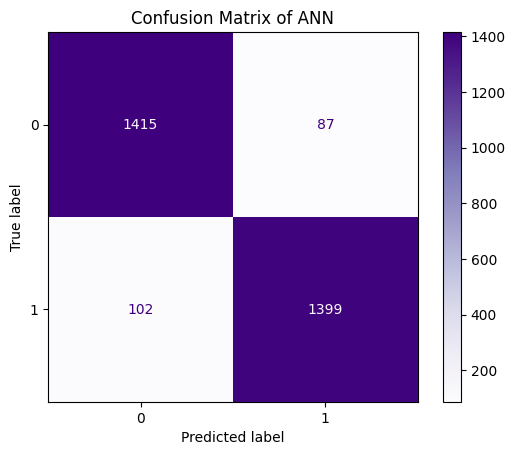

In [ ]:
plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, ann_y_pred, cmap="Purples")
plt.title("Confusion Matrix of ANN")
plt.savefig("plots/ann_cm.png")
plt.show()

### *predictions from our trained model*

In [ ]:
y_pred_proba = ann_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate basic metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model Accuracy: 0.937
Precision: 0.941
Recall: 0.932
F1 Score: 0.937


### *performance visualization*

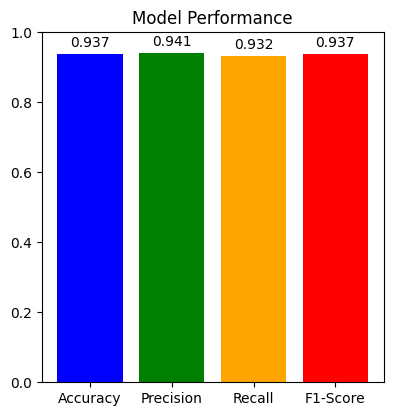

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance')
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center')




### *ROC curve analysis*

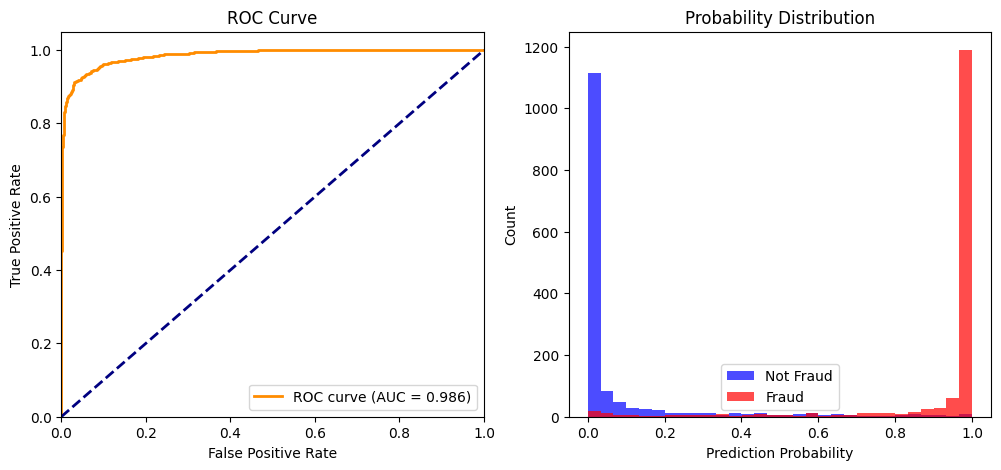

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Prediction probability distribution
plt.subplot(1, 2, 2)
plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Not Fraud', color='blue')
plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Probability Distribution')
plt.legend()

plt.show()


# **StackingClassifier**

In [ ]:

base_learners = [
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=3,
        min_samples_split=50,
        min_samples_leaf=25,
        max_features=0.3,
        random_state=42
    )),
('xgb', XGBClassifier(
        n_estimators=200,
        max_depth=2,
        learning_rate=0.01,
        subsample=0.5,
        colsample_bytree=0.3,
        min_child_weight=20,
        reg_alpha=5.0,
        reg_lambda=10.0,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )),
    ('lgb', LGBMClassifier(
        n_estimators=300,
        max_depth=2,
        learning_rate=0.01,
        num_leaves=5,
        min_data_in_leaf=100,
        feature_fraction=0.3,
        bagging_fraction=0.5,
        bagging_freq=5,
        reg_alpha=5.0,
        reg_lambda=10.0,
        random_state=42
    ))
]

meta_learner = LogisticRegression(
    C=0.001,
    penalty='l2',
    max_iter=100,
    random_state=42
)

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)


In [ ]:
# Train
stack_model.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=3,
                                                       max_features=0.3,
                                                       min_samples_leaf=25,
                                                       min_samples_split=50,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.3, device=None,
                                              early_stopping_rounds=None,
                                              enable_cat...
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('lgb',
                                LGBMClassifier(bagging_fraction=0.5,
                                               bagging_freq=5,
                                               feature_fraction=0.3,
                                               learning_rate=0.01, max_depth=2,
                                               min_data_in_leaf=100,
                                               n_estimators=300, num_leaves=5,
                                               random_state=42, reg_alpha=5.0,
                                               reg_lambda=10.0))],
                   final_estimator=LogisticRegression(C=0.001, random_state=42),
                   n_jobs=-1)

In [ ]:
# Predict
stack_y_pred = stack_model.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Metrics
stack_accuracy = accuracy_score(y_test, stack_y_pred)
stack_precision = precision_score(y_test, stack_y_pred)
stack_recall = recall_score(y_test, stack_y_pred)
stack_f1 = f1_score(y_test, stack_y_pred)

print("\n🔹 Stacking Classifier Results:")
print(f"Accuracy: {stack_accuracy:.2f}")
print(f"Precision: {stack_precision:.2f}")
print(f"Recall: {stack_recall:.2f}")
print(f"F1 Score: {stack_f1:.2f}")
print("Classification Report:\n", classification_report(y_test, stack_y_pred))


🔹 Stacking Classifier Results:
Accuracy: 0.89
Precision: 0.94
Recall: 0.84
F1 Score: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1502
           1       0.94      0.84      0.89      1501

    accuracy                           0.89      3003
   macro avg       0.90      0.89      0.89      3003
weighted avg       0.90      0.89      0.89      3003



# **LightGBM model**

In [ ]:
lgb_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.005,
    max_depth=2,
    num_leaves=3,
    min_data_in_leaf=200,
    min_child_weight=50,
    feature_fraction=0.2,
    bagging_fraction=0.3,
    bagging_freq=3,
    lambda_l1=10.0,
    lambda_l2=20.0,
    min_gain_to_split=2.0,
    max_bin=50,
    random_state=42,
    verbose=-1
)


In [ ]:
# Train
lgb_model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], eval_metric="logloss")

LGBMClassifier(bagging_fraction=0.3, bagging_freq=3, feature_fraction=0.2,
               lambda_l1=10.0, lambda_l2=20.0, learning_rate=0.005, max_bin=50,
               max_depth=2, min_child_weight=50, min_data_in_leaf=200,
               min_gain_to_split=2.0, num_leaves=3, random_state=42,
               verbose=-1)

In [ ]:
# Predict
lgb_y_pred = lgb_model.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Metrics
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
lgb_precision = precision_score(y_test, lgb_y_pred)
lgb_recall = recall_score(y_test, lgb_y_pred)
lgb_f1 = f1_score(y_test, lgb_y_pred)

print("\n🔹 LightGBM Results:")
print(f"Accuracy: {lgb_accuracy:.2f}")
print(f"Precision: {lgb_precision:.2f}")
print(f"Recall: {lgb_recall:.2f}")
print(f"F1 Score: {lgb_f1:.2f}")
print("Classification Report:\n", classification_report(y_test, lgb_y_pred))


🔹 LightGBM Results:
Accuracy: 0.90
Precision: 0.89
Recall: 0.93
F1 Score: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1502
           1       0.89      0.93      0.91      1501

    accuracy                           0.90      3003
   macro avg       0.91      0.90      0.90      3003
weighted avg       0.91      0.90      0.90      3003



<Figure size 800x600 with 0 Axes>

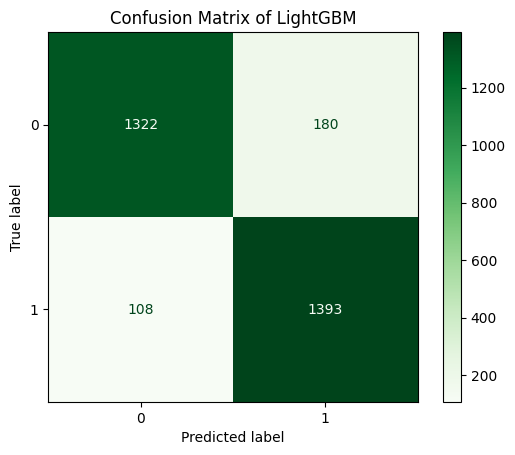

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, lgb_y_pred, cmap="Greens")
plt.title("Confusion Matrix of LightGBM")
plt.savefig("plots/lgb_cm.png")
plt.show()

# **Staking classifier - NB**

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=30, max_depth=3, min_samples_split=50, min_samples_leaf=25, max_features=0.3, n_jobs=-1, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=2, min_samples_split=80, min_samples_leaf=40, random_state=42)),
    ('ridge', RidgeClassifier(alpha=10.0, random_state=42)),
    ('nb', GaussianNB(var_smoothing=1e-3))
]

meta_learner = LogisticRegression(C=0.01, max_iter=50, random_state=42)

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=2, n_jobs=-1)

stack_model.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



Stacking Model Accuracy: 86.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1502
           1       0.97      0.76      0.85      1501

    accuracy                           0.87      3003
   macro avg       0.89      0.87      0.87      3003
weighted avg       0.89      0.87      0.87      3003



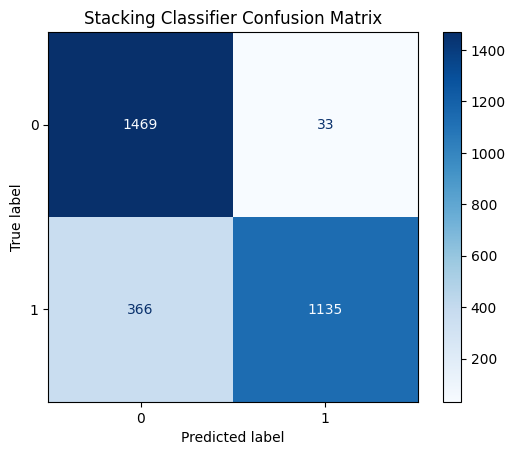

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Stacking Classifier Confusion Matrix')
plt.show()

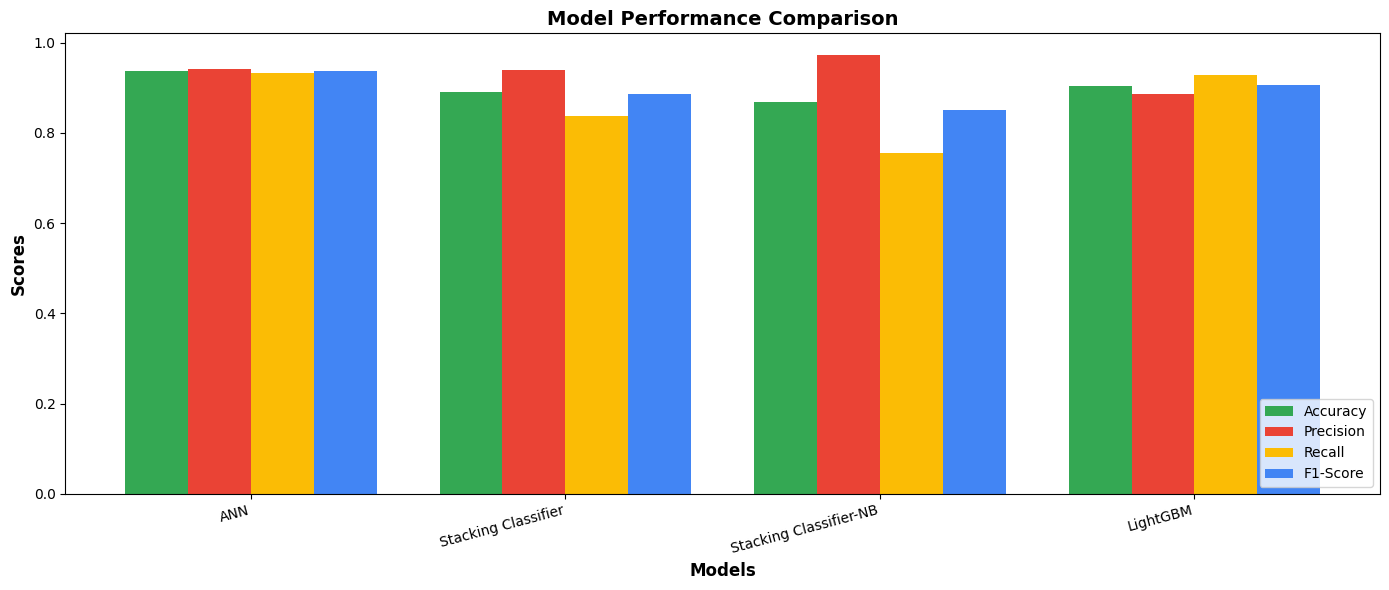

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['ANN', 'Stacking Classifier', 'Stacking Classifier-NB', 'LightGBM']

ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_precision = precision_score(y_test, ann_y_pred)
ann_recall = recall_score(y_test, ann_y_pred)
ann_f1 = f1_score(y_test, ann_y_pred)

stack_accuracy = accuracy_score(y_test, stack_y_pred)
stack_precision = precision_score(y_test, stack_y_pred)
stack_recall = recall_score(y_test, stack_y_pred)
stack_f1 = f1_score(y_test, stack_y_pred)

stack_nb_accuracy = accuracy_score(y_test, y_pred)
stack_nb_precision = precision_score(y_test, y_pred)
stack_nb_recall = recall_score(y_test, y_pred)
stack_nb_f1 = f1_score(y_test, y_pred)

lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
lgb_precision = precision_score(y_test, lgb_y_pred)
lgb_recall = recall_score(y_test, lgb_y_pred)
lgb_f1 = f1_score(y_test, lgb_y_pred)

accuracy_scores = [ann_accuracy, stack_accuracy, stack_nb_accuracy, lgb_accuracy]
precision_scores = [ann_precision, stack_precision, stack_nb_precision, lgb_precision]
recall_scores = [ann_recall, stack_recall, stack_nb_recall, lgb_recall]
f1_scores = [ann_f1, stack_f1, stack_nb_f1, lgb_f1]

# Create comparison plot
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='#34A853')
bars2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='#EA4335')
bars3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='#FBBC05')
bars4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score', color='#4285F4')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Scores', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

# **Fine tuned ANN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.15),

    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.15),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=4, min_lr=0.00001, mode='max', verbose=1)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=128,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'\nOptimized ANN Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7811 - loss: 0.5129 - val_accuracy: 0.8472 - val_loss: 0.4540 - learning_rate: 0.0010
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8976 - loss: 0.3204 - val_accuracy: 0.8693 - val_loss: 0.3580 - learning_rate: 0.0010
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9126 - loss: 0.2702 - val_accuracy: 0.8834 - val_loss: 0.3279 - learning_rate: 0.0010
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9165 - loss: 0.2579 - val_accuracy: 0.8784 - val_loss: 0.3534 - learning_rate: 0.0010
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9235 - loss: 0.2409 - val_accuracy: 0.9047 - val_loss: 0.2847 - learning_rate: 0.0010
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9251 - loss: 0.2344 - val_accuracy: 0.9042 - val_loss: 0.3088 - learning_rate: 0.0010
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9350 - loss: 0.2039 - val_accuracy: 0.8301 - v

# **Learning** **Curves (Accuracy)**

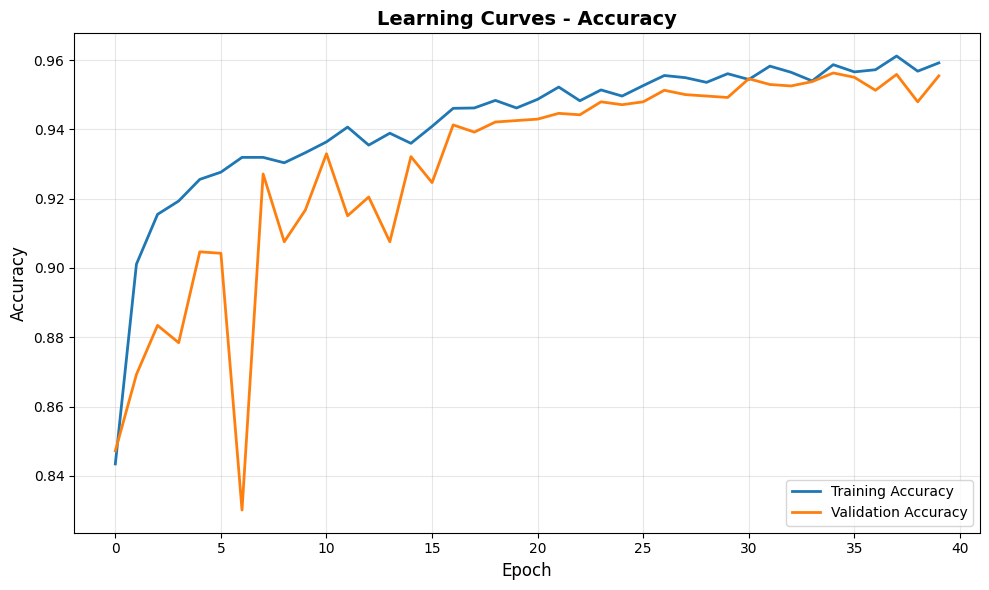

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Learning Curves (Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Learning Curves - Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# **Loss Curves**

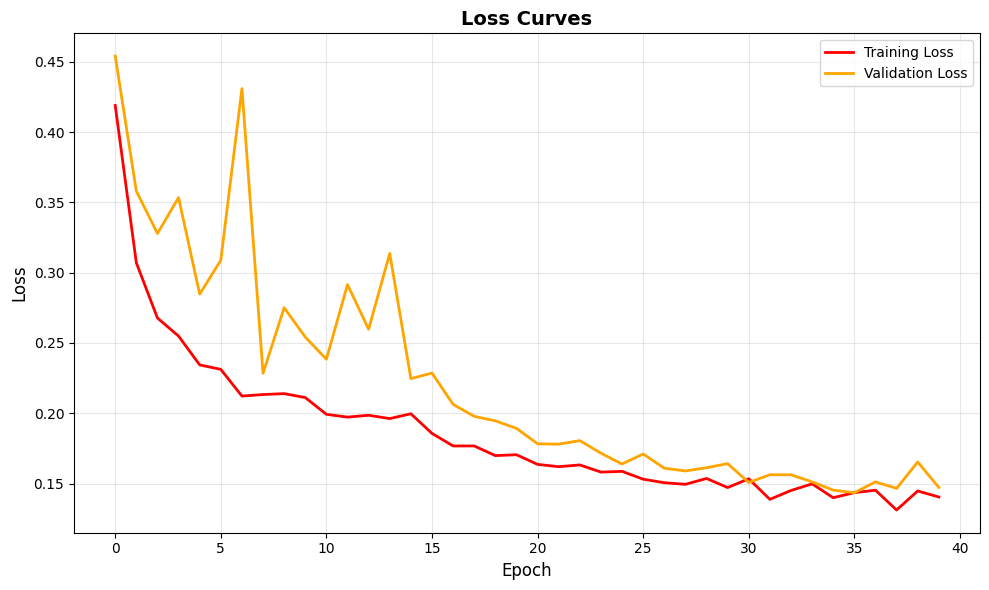

In [ ]:
# 2. Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
plt.title('Loss Curves', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#  **Training Curves**

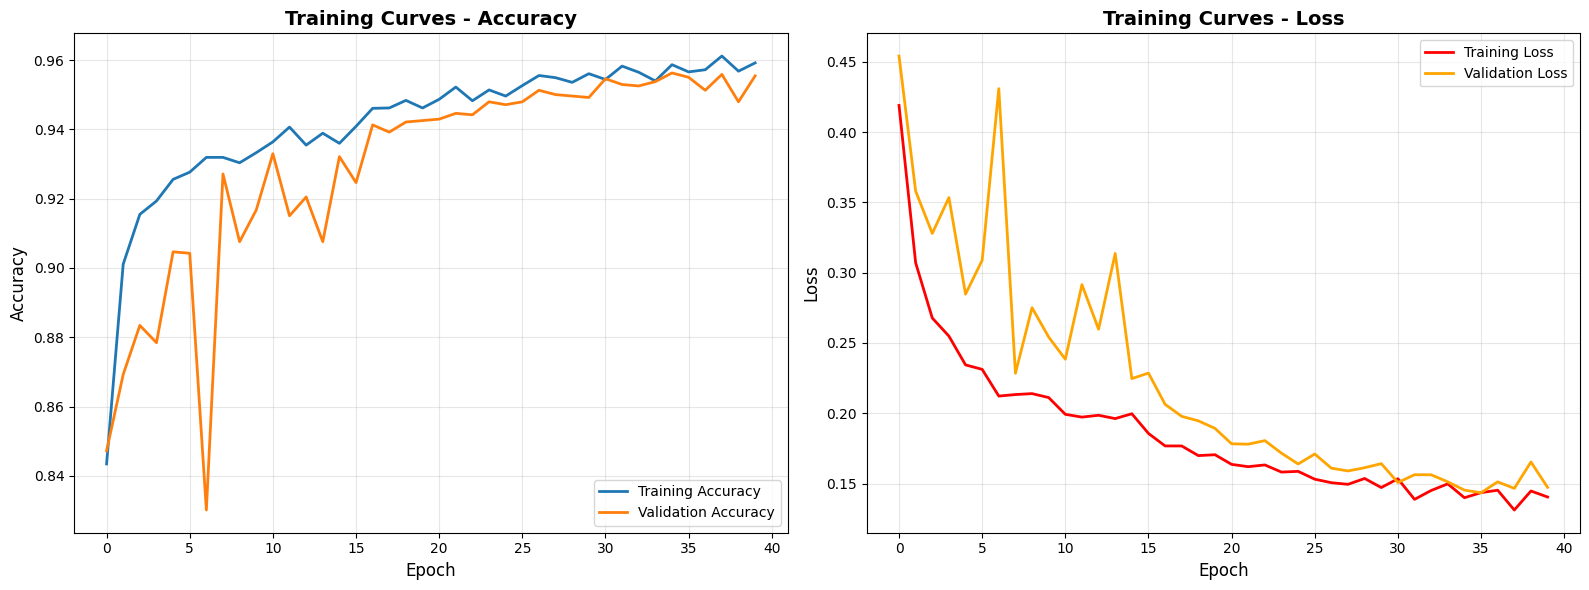

In [ ]:
# Training Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Training Curves - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training Loss', linewidth=2, color='red')
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
ax2.set_title('Training Curves - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#  **ROC Curve**

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


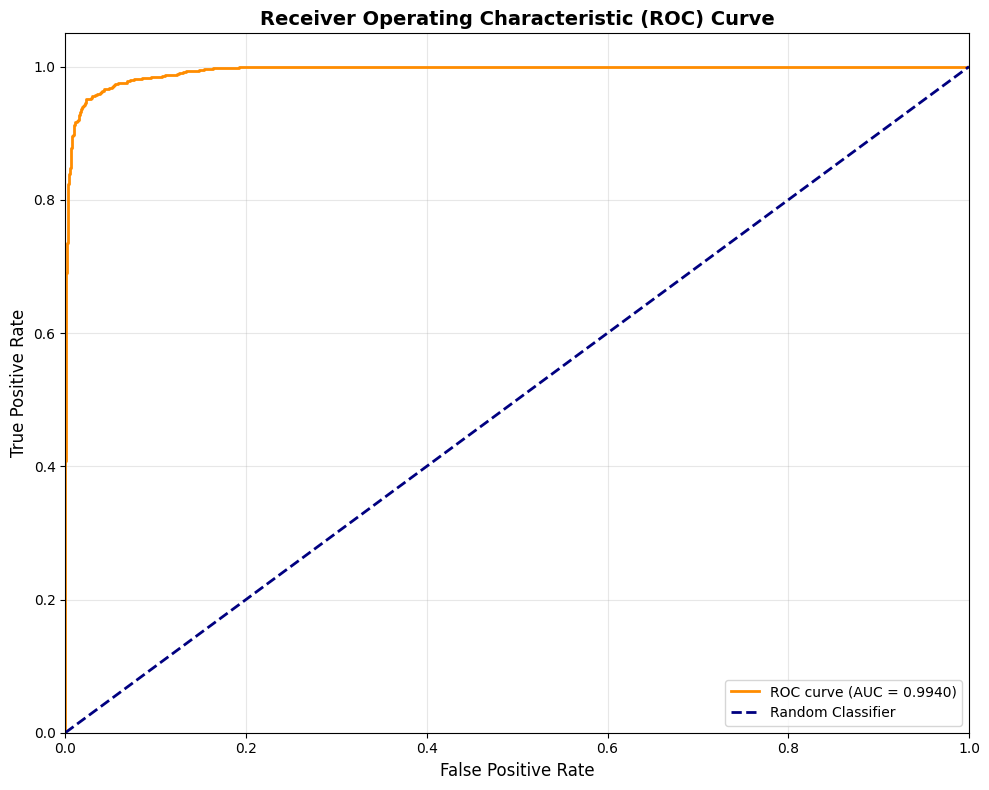

In [ ]:
# ROC Curve
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# **Confusion Matrix**

<Figure size 800x600 with 0 Axes>

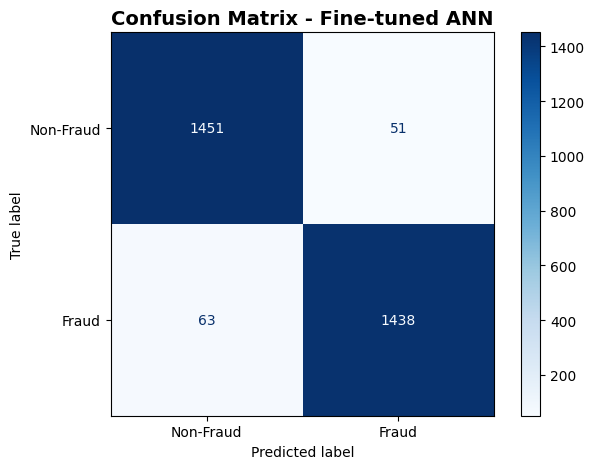

In [ ]:
# Confusion Matrix
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Fine-tuned ANN', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# **Comparative Bar Charts**

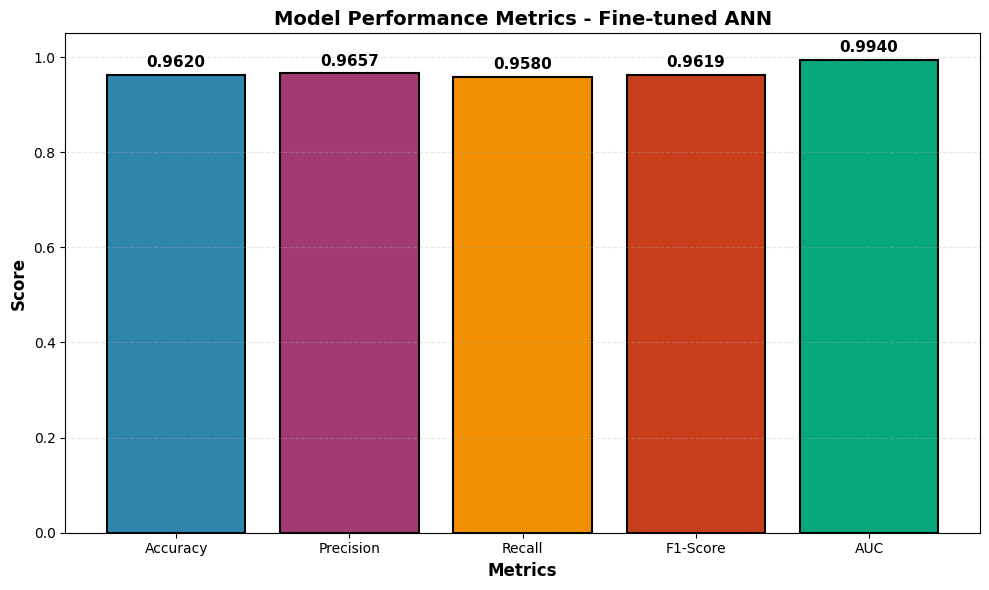

In [ ]:
# Comparative Bar Charts (Multiple Metrics)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
scores = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, scores, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#06A77D'],
               edgecolor='black', linewidth=1.5)
plt.ylim([0, 1.05])
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.title('Model Performance Metrics - Fine-tuned ANN', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()